In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import math

READING CSV 

In [2]:
data = pd.read_csv("financial_data.csv")
data.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",1/1/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",1/1/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",6/1/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",6/1/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",6/1/2014,6,June,2014


column information of dataset

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Segment                700 non-null    object 
 1   Country                700 non-null    object 
 2    Product               700 non-null    object 
 3    Discount Band         700 non-null    object 
 4    Units Sold            700 non-null    float64
 5    Manufacturing Price   700 non-null    float64
 6    Sale Price            700 non-null    float64
 7    Gross Sales           700 non-null    float64
 8    Discounts             647 non-null    float64
 9     Sales                700 non-null    float64
 10   COGS                  700 non-null    float64
 11   Profit                637 non-null    float64
 12  Date                   700 non-null    object 
 13  Month Number           700 non-null    int64  
 14   Month Name            700 non-null    object 
 15  Year  

NEED TO CONVERT FEW COLUMNS TO NUMBER AS THEY HAVE NUMERIC VALUES

In [ ]:
cols_to_convert = [
    ' Units Sold ',
    ' Manufacturing Price ',
    ' Sale Price ',
    ' Gross Sales ', 
    ' Discounts ',
    '  Sales ', 
    ' COGS ', 
    ' Profit '
         
]

for col in cols_to_convert:
    data[col] = data[col].str.replace('[$,]','',regex=True)
    data[col] = pd.to_numeric(data[col], errors='coerce')


In [35]:
data.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,NaN,32370.0,16185.0,16185.0,1/1/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,NaN,26420.0,13210.0,13210.0,1/1/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,NaN,32670.0,21780.0,10890.0,6/1/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,NaN,13320.0,8880.0,4440.0,6/1/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,NaN,37050.0,24700.0,12350.0,6/1/2014,6,June,2014


STATISTICAL INFORMATION OF DATASET

In [21]:
data.describe()

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Year
count,700.000000,700.000000,700.000000,7.000000e+02,647.000000,7.000000e+02,700.000000,637.000000,700.000000,700.000000
mean,1608.294286,96.477143,118.428571,1.827594e+05,14227.586182,1.696091e+05,145475.211429,27741.010204,7.900000,2013.750000
std,867.427859,108.602612,136.775515,2.542623e+05,23562.833084,2.367263e+05,203865.506118,43059.332936,3.377321,0.433322
min,200.000000,3.000000,7.000000,1.799000e+03,18.410000,1.655080e+03,918.000000,285.600000,1.000000,2013.000000
25%,905.000000,5.000000,12.000000,1.739175e+04,1061.000000,1.592800e+04,7490.000000,3875.850000,5.750000,2013.750000
50%,1542.500000,10.000000,20.000000,3.798000e+04,3108.000000,3.554020e+04,22506.250000,11106.100000,9.000000,2014.000000
75%,2229.125000,250.000000,300.000000,2.790250e+05,18809.250000,2.610775e+05,245607.500000,25162.000000,10.250000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,12.000000,2014.000000


LISTING COLUMNS

In [14]:
columns = data.select_dtypes(include=['object','int64','float64']).columns
print("Columns of dataset:",columns)

Columns of dataset: Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')


STATISTICAL ANALYSIS FOR EACH NUMERICAL COLUMN

In [24]:
num_coloumns = cols_to_convert
cat_cols = data.select_dtypes(include=['object']).columns
print("Numeric columns:",num_coloumns,"\n Category columns:",cat_cols)

Numeric columns: [' Units Sold ', ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ', '  Sales ', ' COGS ', ' Profit '] 
 Category columns: Index(['Segment', 'Country', ' Product ', ' Discount Band ', 'Date',
       ' Month Name '],
      dtype='object')


In [31]:
summary = pd.DataFrame({
    'mean': data.mean(numeric_only=True),
    'median': data.median(numeric_only=True)
}).round(2)

summary

,mean,median
Units Sold,1608.29,1542.50
Manufacturing Price,96.48,10.00
Sale Price,118.43,20.00
Gross Sales,182759.43,37980.00
Discounts,14227.59,3108.00
Sales,169609.07,35540.20
COGS,145475.21,22506.25
Profit,27741.01,11106.10
Month Number,7.90,9.00
Year,2013.75,2014.00


INCLUDING Z-SCORE TO CHECK OUTLIERS

In [41]:
for col in num_coloumns:
    col_mean = data[col].mean()
    col_median = data[col].median()
    z_score = np.abs(stats.zscore(data[col]))
    outliers = (z_score>3).sum()
    skew_value = data[col].skew().round(2)

    print(f"Column: {col}")
    print(f"Mean: {col_mean:.2f}")
    print(f"Median: {col_median:.2f}")
    if outliers>0:
        print(f"Outliers exists: Total outliers (z-score > 3): {outliers}")
    else : print(f"No Outliers.")
    if skew_value>0:print(f"{str.upper(col)} is right skewed. its skew value: {skew_value}")
    elif skew_value<0:print(f"{str.upper(col)} is left skewed. its skew value: {skew_value}")
    else: print(f"{str.upper(col)} is normally skewed. its skew value: {skew_value}")
    print("-" *20)

Column:  Units Sold 
Mean: 1608.29
Median: 1542.50
Outliers exists: Total outliers (z-score > 3): 4
 UNITS SOLD  is right skewed. its skew value: 0.44
--------------------
Column:  Manufacturing Price 
Mean: 96.48
Median: 10.00
No Outliers.
 MANUFACTURING PRICE  is right skewed. its skew value: 0.59
--------------------
Column:  Sale Price 
Mean: 118.43
Median: 20.00
No Outliers.
 SALE PRICE  is right skewed. its skew value: 0.77
--------------------
Column:  Gross Sales 
Mean: 182759.43
Median: 37980.00
Outliers exists: Total outliers (z-score > 3): 14
 GROSS SALES  is right skewed. its skew value: 1.67
--------------------
Column:  Discounts 
Mean: 14227.59
Median: 3108.00
No Outliers.
 DISCOUNTS  is right skewed. its skew value: 2.57
--------------------
Column:   Sales 
Mean: 169609.07
Median: 35540.20
Outliers exists: Total outliers (z-score > 3): 13
  SALES  is right skewed. its skew value: 1.7
--------------------
Column:  COGS 
Mean: 145475.21
Median: 22506.25
Outliers exists: 

HEATMAP

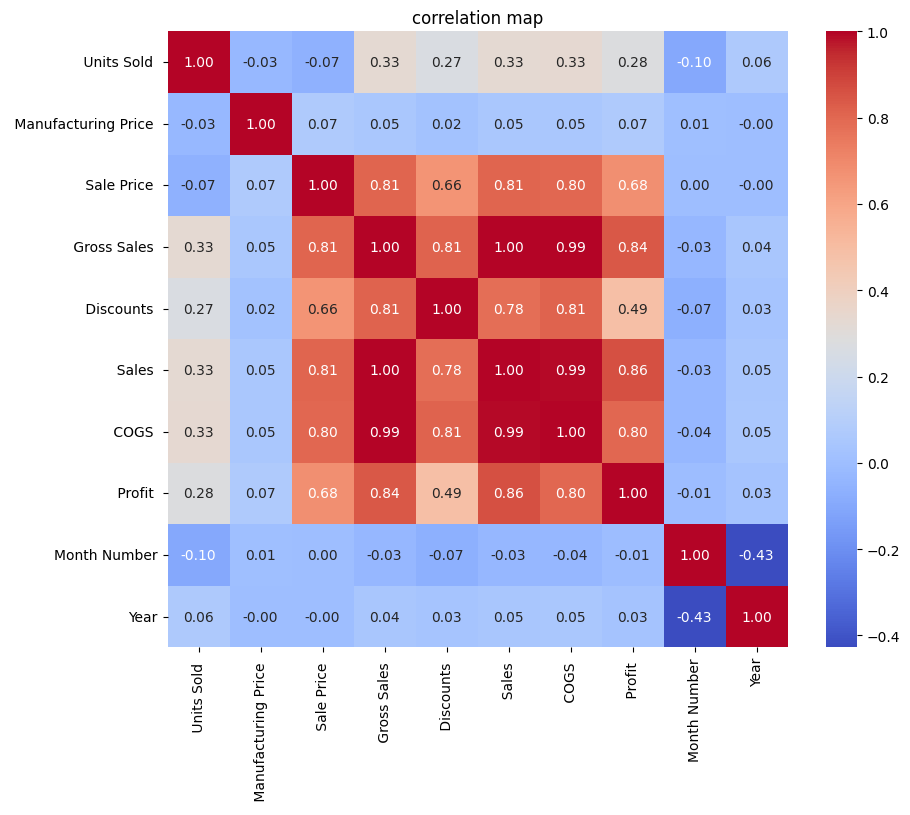

In [42]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("correlation map")
plt.show()

HISTOGRAM FOR EACH NUMERIC COLUMN

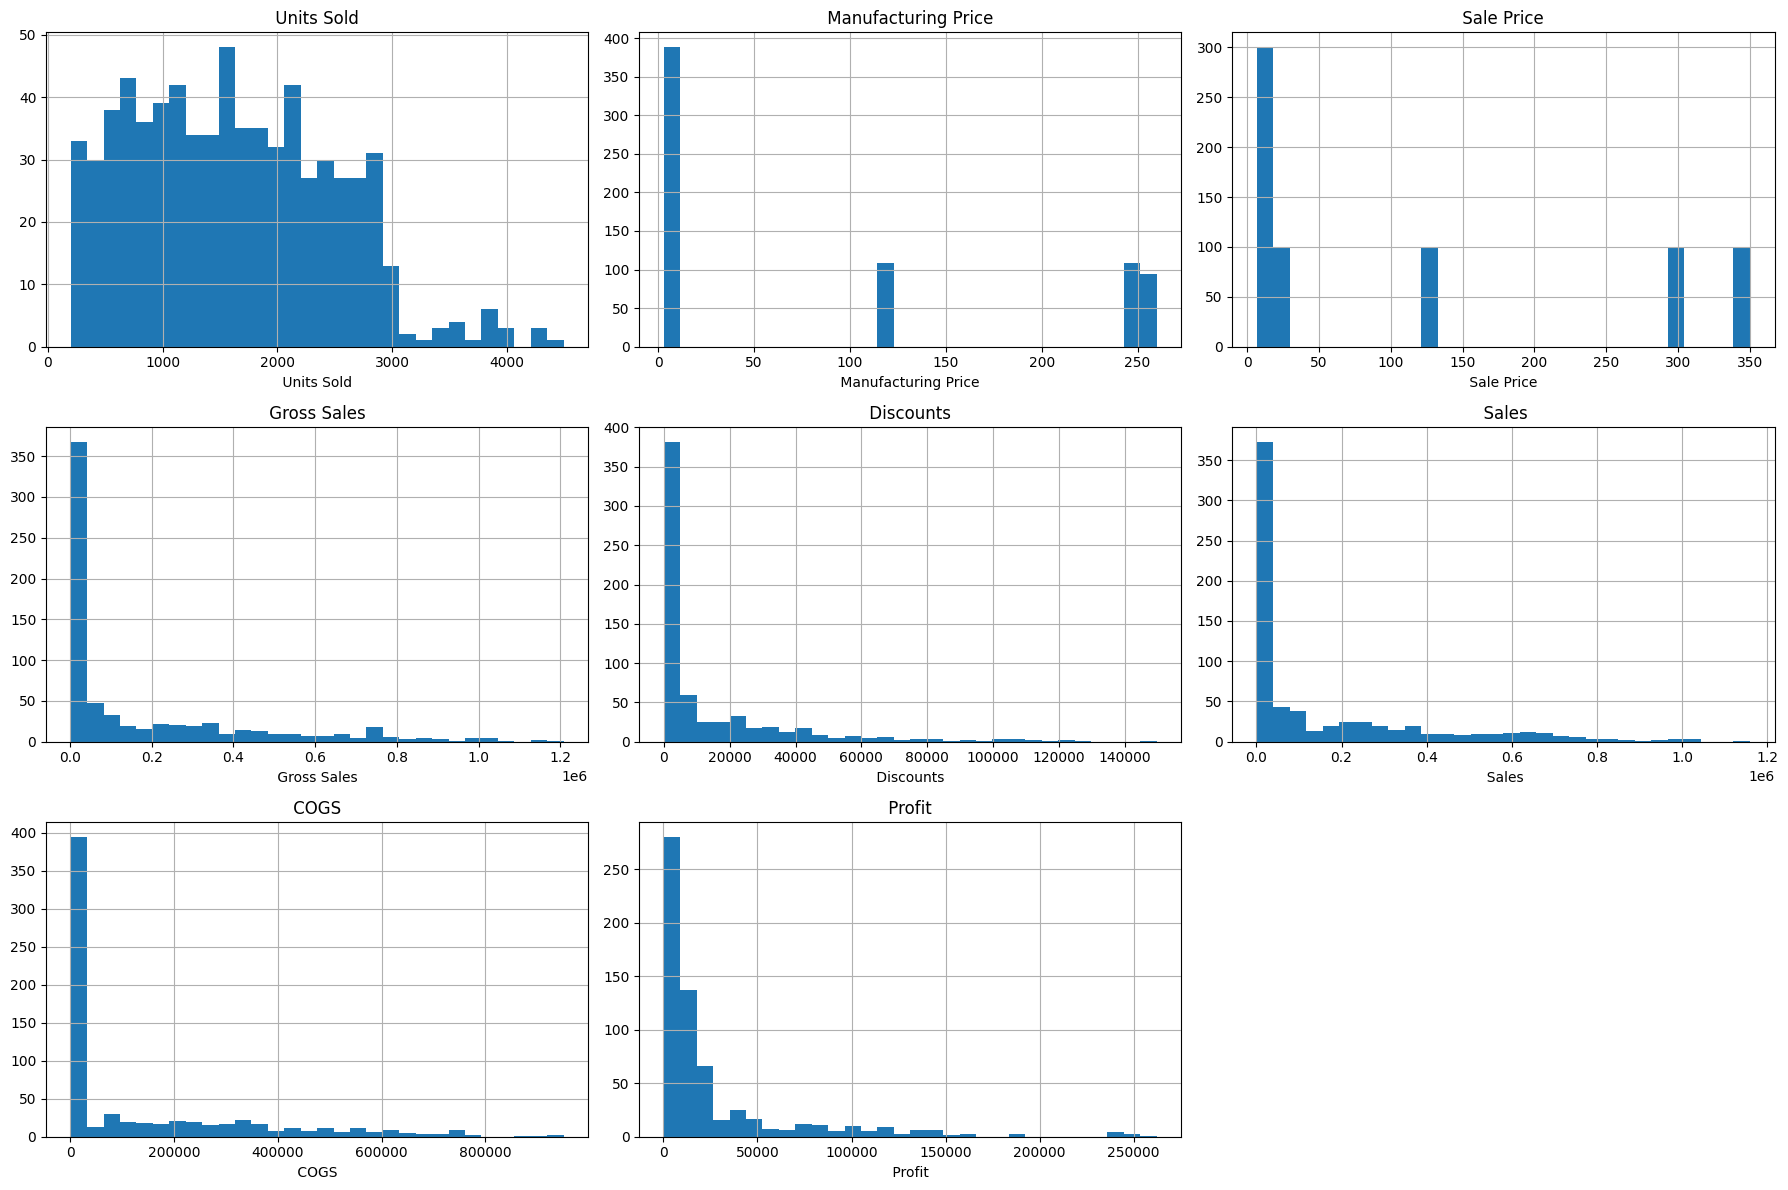

In [44]:
len_num_cols = len(num_coloumns)

rows = math.ceil(len_num_cols/3)
fig,axes = plt.subplots(rows,3,figsize=(18,rows*4))

#converting 2D array to 1D axes
axes = axes.flatten()

for i,col in enumerate(num_coloumns):
    data[col].hist(ax=axes[i],bins=30)
    axes[i].set_title(col,fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_label('frequency')

for j in range(i+1,len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()